<a href="https://colab.research.google.com/github/FelipeVillegasH/Tareas_Coding_Dojo_Track2/blob/main/Linear_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Techniques
## By Felipe Villegas

In [240]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [241]:
col_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
### Figure this out!
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None,names = col_names)

In [242]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [243]:
# preliminary analysis of the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [244]:
# number of classes 
print('Class labels', np.unique(df['Class label']))

Class labels [1 2 3]


In [245]:
# to see how many observations for each class we got
df['Class label'].value_counts(dropna = False)

2    71
1    59
3    48
Name: Class label, dtype: int64

One Vs All

In [246]:
X = df.loc[:, df.columns[(df.columns != 'Class label')]]
y = df.loc[:, 'Class label'].values

In [247]:
X.shape

(178, 13)

In [248]:
y.shape

(178,)

In [249]:
# data split and stratification od the training and testing data sets
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.25, 
                                                   random_state=0, 
                                                   stratify=y)

In [250]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 44, 2: 53, 3: 36}

In [251]:
# Standarizing the data
scaler = StandardScaler()
# Fitting the data
scaler.fit(X_train)
# Transform apply 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [266]:
log_reg = LogisticRegression(penalty='l2',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9924812030075187
Test accuracy: 1.0


In [253]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))
# we can conclude that the accuracy considering the l2 error is better when considering the l1 (absolute value pentalty), thus the penalizing when using the squared penalty
# l2 is bigger. 
# the l1 and the l2 are the residuals between predicted and observed values meassured by the sum of the squared residuals and thus less error 
# the l1 and the l2 exist to counter overfitting 

Training accuracy: 1.0
Test accuracy: 1.0


In [254]:
log_reg.intercept_

array([-1.30068476, -1.3696364 , -2.32907743])

In [255]:
log_reg.coef_

array([[ 1.21975741,  0.177419  ,  0.71856418, -1.20447529,  0.        ,
         0.        ,  1.34324843,  0.        ,  0.        ,  0.        ,
         0.        ,  0.40303619,  2.60808449],
       [-1.38442803, -0.42691378, -0.93814878,  0.44965358, -0.01729516,
         0.11334851,  0.59285562,  0.        ,  0.        , -1.94816769,
         1.09581684,  0.        , -2.56891007],
       [ 0.21286475,  0.08668845,  0.49633719,  0.        ,  0.        ,
         0.        , -2.54892328,  0.        ,  0.        ,  1.64731187,
        -1.03337583, -0.37216621,  0.        ]])

In [256]:
# the higher probability for each class 
log_reg.predict_proba(X_test[0:1])

array([[0.01170505, 0.00108803, 0.98720692]])

In [257]:
# the higher probability class
log_reg.predict(X_test[0:1])

array([3])

One Vs One

In [258]:
log_reg = LogisticRegression()
OVO = OneVsOneClassifier(log_reg)

In [259]:
OVO.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [260]:
OVO.score(X_train, y_train)

1.0

In [261]:
OVO.score(X_test, y_test)

1.0

KNN

In [262]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9774436090225563
Test accuracy: 0.9333333333333333


RANDOM FOREST

In [263]:
RandomForest =RandomForestClassifier()
RandomForest.fit(X_train, y_train)
print('Training accuracy:', RandomForest.score(X_train, y_train))
print('Test accuracy:', RandomForest.score(X_test, y_test))


Training accuracy: 1.0
Test accuracy: 1.0


BAGGED TREE

In [264]:
BaggedTree =BaggingClassifier()
BaggedTree.fit(X_train, y_train)
print('Training accuracy:', BaggedTree.score(X_train, y_train))
print('Test accuracy:', BaggedTree.score(X_test, y_test))

Training accuracy: 0.9924812030075187
Test accuracy: 0.9777777777777777


MOST IMPORTANT FEATURES 

In [267]:
log_reg.coef_
# the importance of the feature in the model can be meassured by analizing the coefficients
# the following graphs show us the relevance of each featured on each class compared with the rest of the features 
# being the class 3 the most probable to by classified in for new data

array([[ 1.25422069,  0.37414272,  0.7875139 , -1.37130649,  0.22393903,
         0.23338276,  0.96351086, -0.08778841, -0.01384295, -0.03192723,
         0.06693216,  0.66799346,  1.83991912],
       [-1.39556742, -0.62308958, -1.04826699,  0.74541177, -0.25176818,
         0.20611053,  0.430398  ,  0.15198939,  0.17989784, -1.60326204,
         0.81080215,  0.19147779, -1.87311557],
       [ 0.43962856,  0.36661612,  0.49264865,  0.28463254,  0.10517444,
        -0.24184561, -1.43579537, -0.08561182, -0.33705839,  1.28211086,
        -1.00505563, -0.79858928,  0.15451274]])

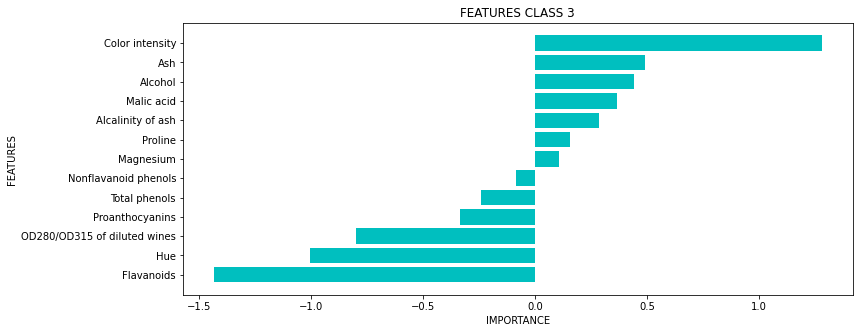

In [280]:
COEFFICIENT3 = pd.DataFrame(zip(X.columns, log_reg.coef_[2]), columns = ['Feature', 'Coef'])
COEFFICIENT3.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(COEFFICIENT3['Feature'], COEFFICIENT3['Coef'], color= 'c')
plt.xlabel('IMPORTANCE')
plt.ylabel('FEATURES')
plt.title('FEATURES CLASS 3');

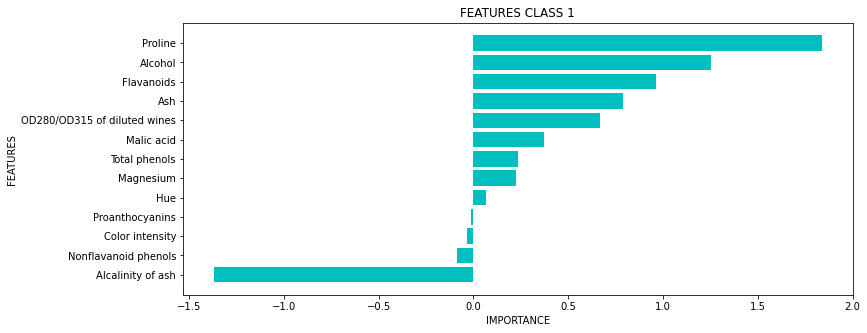

In [281]:
COEFFICIENT1 = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns = ['Feature', 'Coef'])
COEFFICIENT1.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(COEFFICIENT1['Feature'], COEFFICIENT1['Coef'], color= 'c')
plt.xlabel('IMPORTANCE')
plt.ylabel('FEATURES')
plt.title('FEATURES CLASS 1');

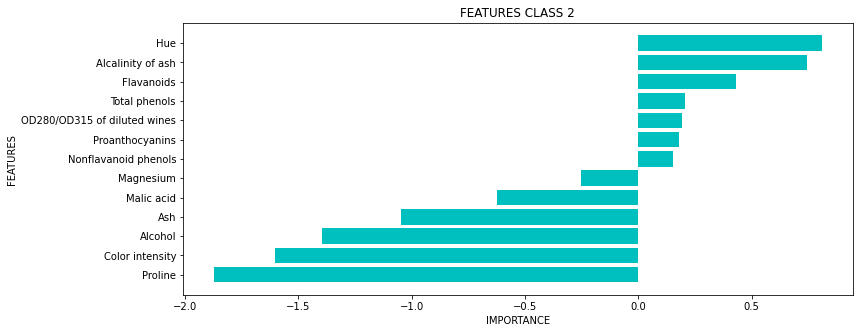

In [282]:
COEFFICIENT2 = pd.DataFrame(zip(X.columns, log_reg.coef_[1]), columns = ['Feature', 'Coef'])
COEFFICIENT2.sort_values(by = 'Coef', inplace = True)
plt.figure(figsize = (12, 5))
plt.barh(COEFFICIENT2['Feature'], COEFFICIENT2['Coef'], color= 'c')
plt.xlabel('IMPORTANCE')
plt.ylabel('FEATURES')
plt.title('FEATURES CLASS 2');

# the model that worked the best is the one with the best accuracy in training and testing data: The Linear regression models considering the l1 penalty. Along side with the Random Forest and the Linear Regression one vs one. Personally I liked better the Random forest model due to its simplicity
